<a href="https://colab.research.google.com/github/okeyezike/australian-health-data-insights/blob/main/01_initial_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Australia Hospital Admissions Analysis (2011–2023)

## 1. Project Overview
#Analyzing trends and demographic patterns in hospital admissions using AIHW data.

## 2. Importing Libraries

import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [55]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [56]:
# Load Excel file
file_path = '/content/drive/MyDrive/myhosp-patient-admission-data-extract.xlsx'

# Get the sheet names
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Print the sheet names
print(sheet_names)

# Now, use the correct sheet name to read the data
df = pd.read_excel(file_path, sheet_name=sheet_names[0], header=23)  # Example: using the first sheet
print(df.head())

['Patient admissions']
                             Reporting unit Reporting unit type State  \
0  Adolescent and Young Adult Hospice Manly            Hospital   NSW   
1  Adolescent and Young Adult Hospice Manly            Hospital   NSW   
2  Adolescent and Young Adult Hospice Manly            Hospital   NSW   
3  Adolescent and Young Adult Hospice Manly            Hospital   NSW   
4  Adolescent and Young Adult Hospice Manly            Hospital   NSW   

  Time period                 Category Number of patient admissions  
0     2022–23               Childbirth                            0  
1     2022–23      Medical (emergency)                            0  
2     2022–23  Medical (non-emergency)                           <5  
3     2022–23            Mental health                            0  
4     2022–23  Other acute (emergency)                            0  


In [57]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103067 entries, 0 to 103066
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Reporting unit                103067 non-null  object
 1   Reporting unit type           103067 non-null  object
 2   State                         103067 non-null  object
 3   Time period                   103067 non-null  object
 4   Category                      103067 non-null  object
 5   Number of patient admissions  103067 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


,0
Reporting unit,0
Reporting unit type,0
State,0
Time period,0
Category,0
Number of patient admissions,0


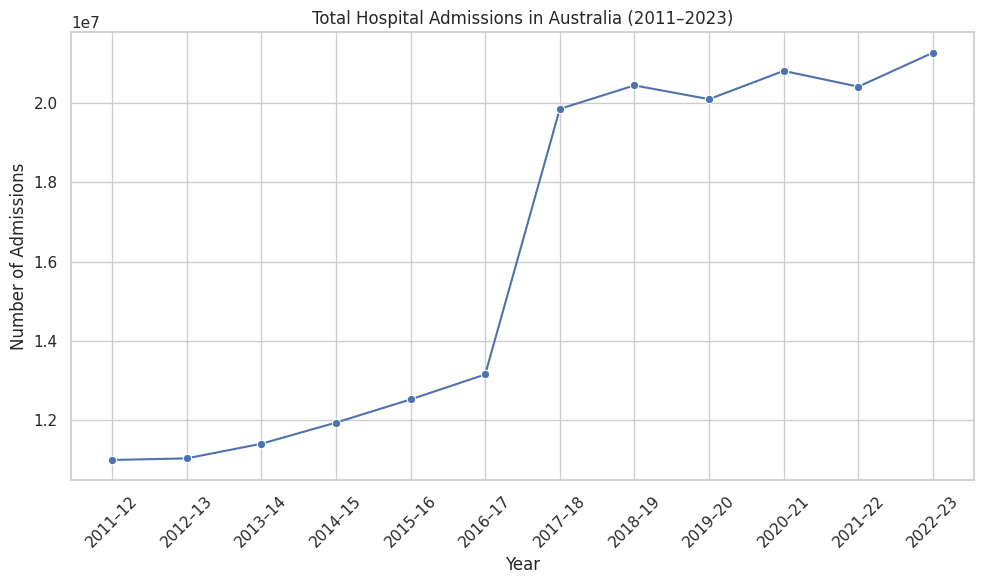

In [58]:
# Convert 'Number of patient admissions' to numeric, coercing errors to NaN
df['Number of patient admissions'] = pd.to_numeric(df['Number of patient admissions'], errors='coerce')

# Now perform the groupby and sum, ignoring NaN values
admissions_by_year = df.groupby('Time period')['Number of patient admissions'].sum(min_count=1).reset_index()
#min_count=1 ensures that if a group has all NaN values, it returns NaN instead of 0.

plt.figure(figsize=(10, 6))
sns.lineplot(data=admissions_by_year, x='Time period', y='Number of patient admissions', marker='o')
plt.title('Total Hospital Admissions in Australia (2011–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Load Excel file
file_path = '/content/drive/MyDrive/myhosp-average-length-of-stay-data-extract.xlsx'

# Get the sheet names
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Print the sheet names
print(sheet_names)

# Now, use the correct sheet name to read the data
df = pd.read_excel(file_path, sheet_name=sheet_names[0], header=13)  # Example: using the first sheet
print(df.head())

['Average length of stay']
                          Reporting unit Reporting unit type State  \
0  Albury Wodonga Health [Albury Campus]            Hospital   NSW   
1  Albury Wodonga Health [Albury Campus]            Hospital   NSW   
2  Albury Wodonga Health [Albury Campus]            Hospital   NSW   
3  Albury Wodonga Health [Albury Campus]            Hospital   NSW   
4  Albury Wodonga Health [Albury Campus]            Hospital   NSW   

        Peer group Time period          Category Total number of stays  \
0  Large hospitals     2011–12  Appendix removal                   140   
1  Large hospitals     2012–13  Appendix removal                   182   
2  Large hospitals     2013–14  Appendix removal                   156   
3  Large hospitals     2014–15  Appendix removal                   178   
4  Large hospitals     2015–16  Appendix removal                   127   

   Unnamed: 7 Number of overnight stays  Unnamed: 9  \
0         NaN                       140         NaN 

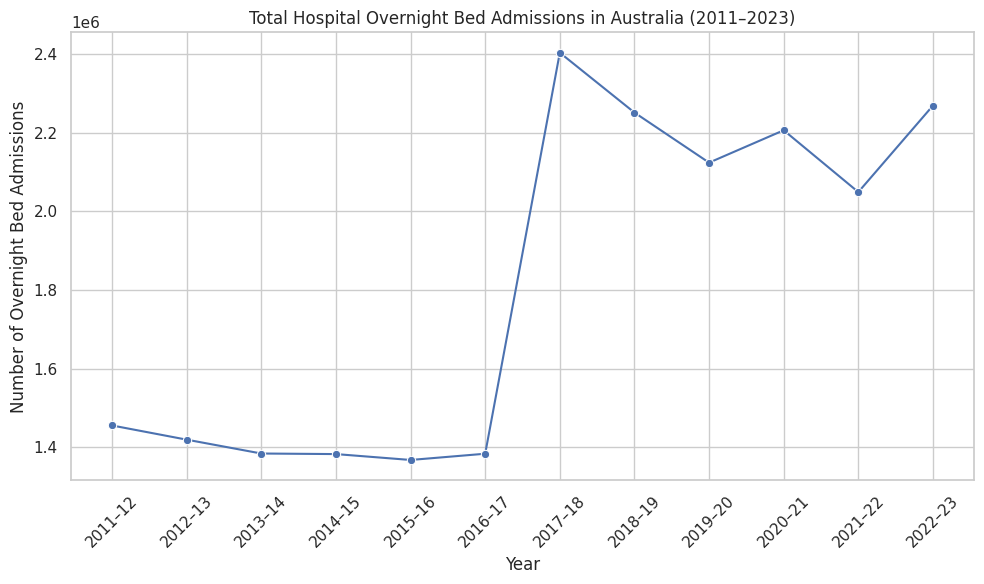

In [60]:
# Convert 'Number of patient admissions' to numeric, coercing errors to NaN
df['Total overnight patient bed days'] = pd.to_numeric(df['Total overnight patient bed days'], errors='coerce')

# Now perform the groupby and sum, ignoring NaN values
overnight_bed_days_by_year = df.groupby('Time period')['Total overnight patient bed days'].sum(min_count=1).reset_index()
#min_count=1 ensures that if a group has all NaN values, it returns NaN instead of 0.

plt.figure(figsize=(10, 6))
sns.lineplot(data=overnight_bed_days_by_year, x='Time period', y='Total overnight patient bed days', marker='o')
plt.title('Total Hospital Overnight Bed Admissions in Australia (2011–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Overnight Bed Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()